# (Ford GoBike System)
## by (Ahmed Ghandour)

## Investigation Overview

> The goal is to get insights form our data and find some interesting fact. For instance, find which factors affects the bike rides positivly or negativly.

## Dataset Overview

> Bay Wheels's trip data contains the real-time system data. ]ata represents bikes rides in July 2019 and it has 258102 observations and 15 columns.

Dataset includes the following columns:

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
* Rental Access Method (mobile app or Clipper)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline
base_color = sns.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('../data/201907-baywheels-tripdata.csv', parse_dates=True)
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.rental_access_method = df.rental_access_method.astype('category')
df.user_type = df.user_type.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')
df.query('duration_sec < 2000', inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Most Popular Hours Of The Day)

> Here we can see hours which has the most number of requests in each day. We can notice that the most number of rides are in early morning when people goes to their work (8AM, and 9AM), and afternoon when people are on their way home after work (from 4PM to 6PM).

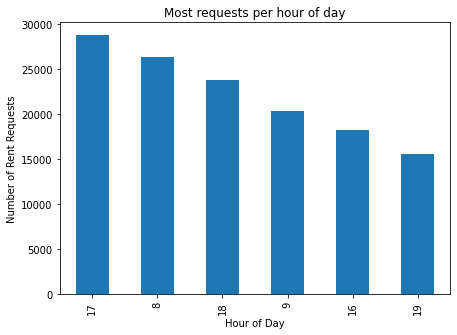

In [3]:
# Most number of rides in each hour of the day
plt.figure(figsize=(7,5))
df.start_time.dt.hour.value_counts()[:6].plot(kind='bar')
plt.title('Most requests per hour of day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rent Requests')
plt.show()

## (Most Popular Days)

> We can notice that most number of requests are within working days specially in the middle of the week. On the other hand we can notice that the least number of requests are during weekend.

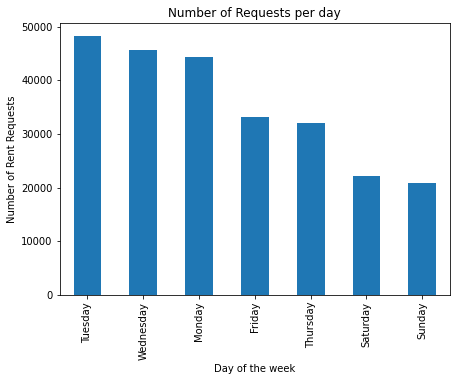

In [4]:
plt.figure(figsize=(7,5))
rpdow = df.start_time.dt.dayofweek.value_counts()
rpdow.index = rpdow.index.map(dict(enumerate(calendar.day_name)))
rpdow.plot(kind='bar')
plt.title('Number of Requests per day')
plt.xlabel('Day of the week')
plt.ylabel('Number of Rent Requests')
plt.show()

## (Subscribed Users VS Guest Users)

> It shows the number of Subscribed Users against Guest Users or customers. Registered users represent more than 80% of bike rides requests in July 2019.

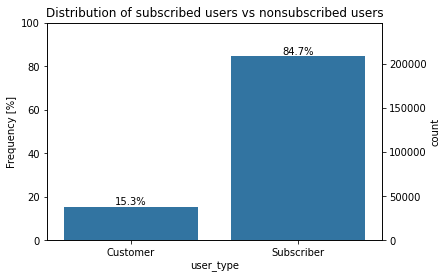

In [5]:
ax = sns.countplot(data=df, x='user_type', color=base_color)
plt.title('Distribution of subscribed users vs nonsubscribed users')
plt.xlabel('user_type')
ncount = len(df)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
plt.show()

## (Rental Method vs Duration Per User Type)

> In general mobile app users tend to rent bikes for more duration than thos who use clippers. Also guest or or casual users who use the app tend to rent bikes more time than the subscribed app users.

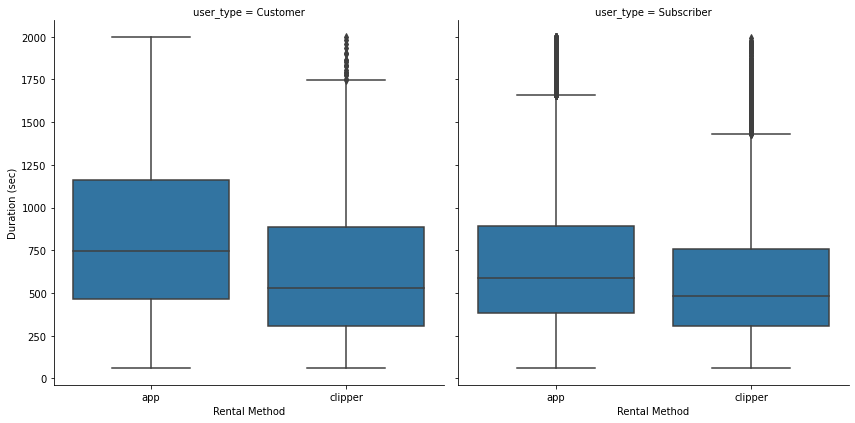

In [6]:
ax = sns.FacetGrid(data=df, col='user_type', size = 6)
ax.map(sns.boxplot, 'rental_access_method', 'duration_sec')
ax.set_xlabels('Rental Method')
ax.set_ylabels('Duration (sec)')
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!